In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd

In [13]:
df= pd.read_csv('titanic.csv')
df.iloc[:,0]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

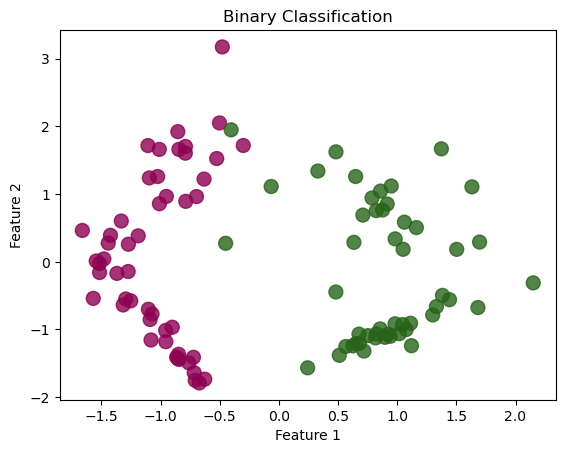

In [5]:
# Create a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

# Plot the binary classification dataset
plt.scatter(X[:, 0], X[:, 1], c=y ,s =100, cmap='PiYG', alpha = 0.8)
plt.title('Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.savefig('Binary Classification.png', transparent = True)
plt.show()

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

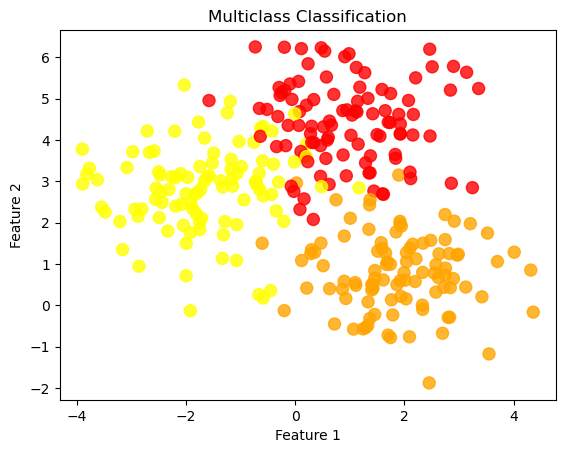

In [16]:
# Create a multiclass classification dataset
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=0)

# Define a colormap
cmap = ListedColormap(['red', 'orange', 'yellow'])

# Plot the multiclass classification dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s =75, alpha =0.8)
plt.title('Multiclass Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.savefig('Multiclass Classification.png', transparent =True)
plt.show()

In [22]:
###Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd

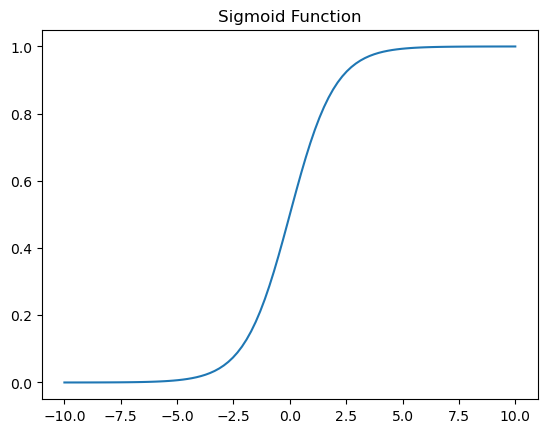

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))      

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title("Sigmoid Function")
plt.show()

In [24]:
#np.random.normal(0, 1, (50, 1))

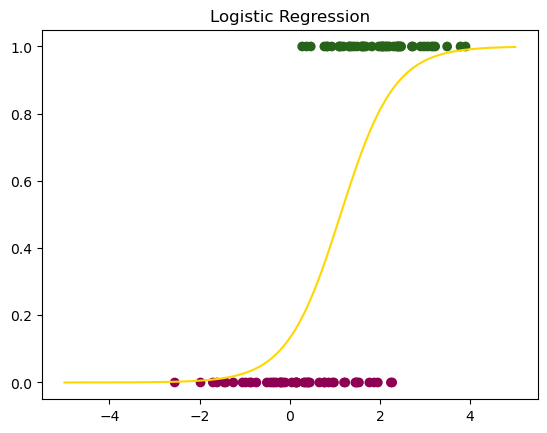

In [41]:
# Generate synthetic data
np.random.seed(0)
X = np.concatenate((np.random.normal(0, 1, (50, 1)),
                    np.random.normal(2, 1, (50, 1))), axis=0)

y = np.concatenate((np.zeros(50), np.ones(50)))

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)

# Plot data and decision boundary
plt.scatter(X, y, c=y, cmap = 'PiYG')
X_test = np.linspace(-5, 5, 300)
loss = 1 / (1 + np.exp(-model.coef_[0][0]*X_test - model.intercept_[0]))
plt.plot(X_test, loss, color='gold')
plt.title('Logistic Regression')
plt.show()

In [46]:
model.intercept_[0]

-1.8794583858340739

<AxesSubplot:ylabel='Count'>

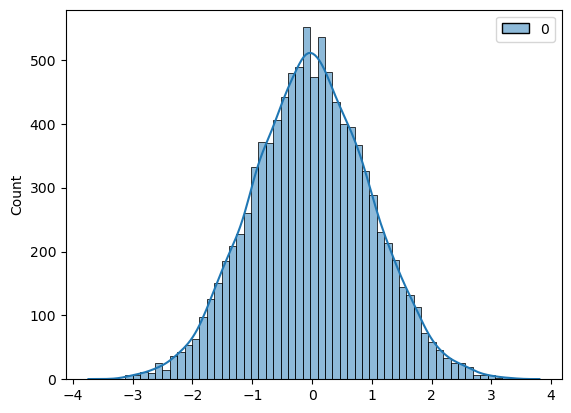

In [29]:
sns.histplot(np.random.normal(0, 1, (10000, 1)), kde =True)

In [32]:
#עצי החלטה
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [33]:
# Generate synthetic data
np.random.seed(1)
X = np.random.rand(100,1)
y = np.where(X > 0.5, 1, 0)

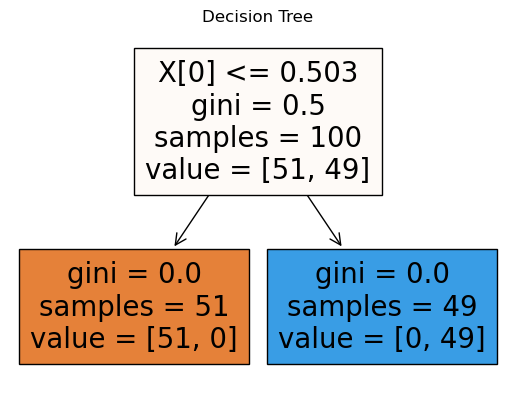

In [34]:
# Fit decision tree
model = DecisionTreeClassifier()
model.fit(X, y)

# Plot decision tree
plt.figure()
plot_tree(model, filled=True)
plt.title('Decision Tree')
plt.show()

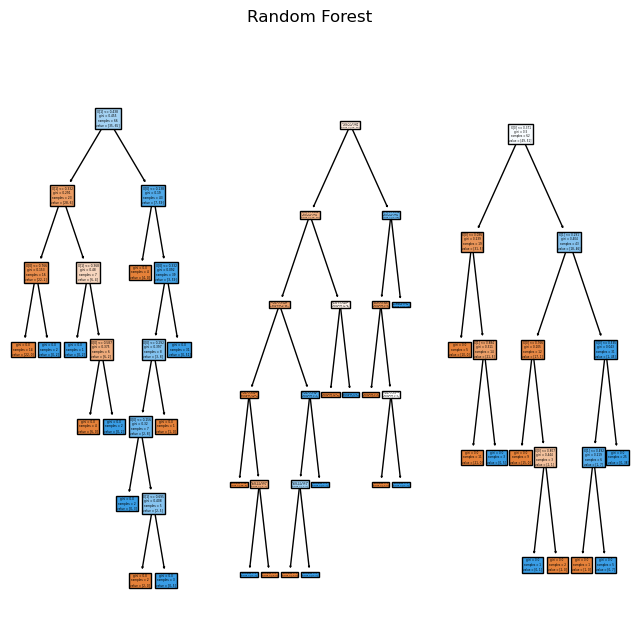

In [38]:
#Random Forest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.where(np.mean(X, axis=1) > 0.5, 1, 0)#אם הממוצע בשורה גדול מחצי שים 1 אחרת שים אפס

# Fit random forest
model = RandomForestClassifier(n_estimators=3)
model.fit(X, y)

# Plot each tree in the forest
fig, axes = plt.subplots(1,3, figsize=(8, 7))
for idx, tree in enumerate(model.estimators_):
    plot_tree(tree, filled=True, ax=axes[idx])
plt.suptitle('Random Forest')
plt.show()

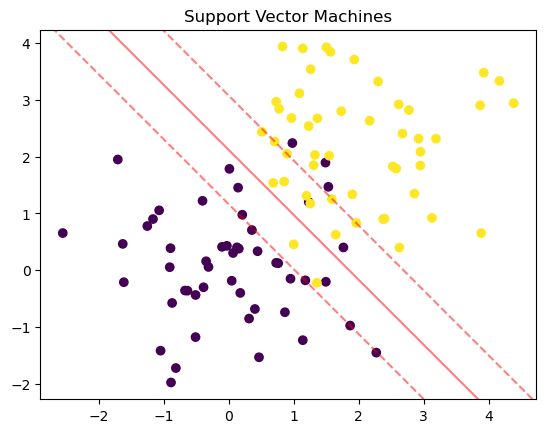

In [39]:
#Support Vector Machines
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
np.random.seed(0)
X = np.concatenate((np.random.normal(0, 1, (50, 2)), np.random.normal(2, 1, (50, 2))), axis=0)
y = np.concatenate((np.zeros(50), np.ones(50)))

# Fit SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Plot data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('Support Vector Machines')
plt.show()


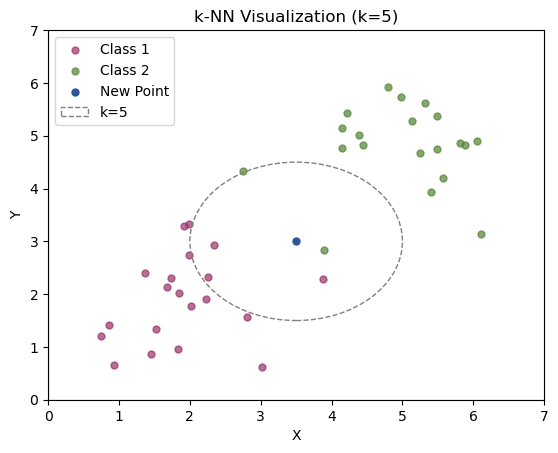

In [40]:
#knn
import matplotlib.pyplot as plt

# Create a simulated dataset for k-NN visualization
red_points = np.random.multivariate_normal(mean=[2, 2], cov=[[0.5, 0], [0, 0.5]], size=20)
green_points = np.random.multivariate_normal(mean=[5, 5], cov=[[0.5, 0], [0, 0.5]], size=20)
blue_point = np.array([[3.5, 3]])

# Visualize the points and the k=5 circle
plt.scatter(red_points[:, 0], red_points[:, 1], color="#993366", label="Class 1", marker ='.', alpha =0.7,s =100)
plt.scatter(green_points[:, 0], green_points[:, 1], color="#548235", label="Class 2",marker ='.', alpha = 0.7,s =100)
plt.scatter(blue_point[:, 0], blue_point[:, 1], color="#2F5597", label="New Point",marker ='.', s =100)

# Add a circle to represent the "k=5" neighborhood
circle = plt.Circle((blue_point[0, 0], blue_point[0, 1]), 1.5, color="gray", fill=False, linestyle="dashed", label="k=5")
plt.gca().add_artist(circle)

# Add labels and legend
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")
plt.title("k-NN Visualization (k=5)")
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.show()


In [ ]:
#Perceptron
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Generate synthetic data
np.random.seed(0)
X = np.concatenate((np.random.normal(0, 1, (50, 2)), np.random.normal(2, 1, (50, 2))), axis=0)
y = np.concatenate((np.zeros(50), np.ones(50)))

# Fit Perceptron
model = Perceptron(tol=1e-3)
model.fit(X, y)

# Plot data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])
plt.title('Perceptron')
plt.show()
